In [1]:
# reqiured imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import difflib as df
from sklearn import tree
from sklearn.externals import joblib


from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, GroupKFold, GroupShuffleSplit
#import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC

from time import *

from collections import defaultdict
from collections import Counter

from scipy.stats import chisquare
import scipy
from autocorrect import spell

import sklearn

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# set style for plots

%matplotlib inline
matplotlib.style.use('seaborn-white')
sns.set_style("whitegrid")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [69]:
test = pd.read_csv('testX.csv')

In [70]:
test.drop("id", axis=1, inplace=True)

In [156]:
train = load_data()

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object


In [154]:
data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [157]:
train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [72]:
test = prepare_data(test)

In [73]:
train = prepare_data(train)

In [100]:
data = test

In [101]:
counts = data['funder'].value_counts()

In [102]:
collist = counts[counts>500].index.tolist()

In [103]:
data.funder = data.funder.apply(groupCategories)

In [104]:
counts = data['installer'].value_counts()

In [105]:
collist = counts[counts>500].index.tolist()

In [106]:
data.installer = data.installer.apply(groupCategories)

In [107]:
counts = data['subvillage'].value_counts()

In [108]:
collist = counts[counts>100].index.tolist()

In [109]:
data.subvillage = data.subvillage.apply(groupCategories)

In [110]:
counts = data['scheme_name'].value_counts()

In [111]:
collist = counts[counts>100].index.tolist()

In [112]:
data.scheme_name = data.scheme_name.apply(groupCategories)

In [113]:
counts = data['funder'].value_counts()

In [114]:
collist = counts[counts>500].index.tolist()

In [115]:
data.funder = data.funder.apply(groupCategories)

In [116]:
counts = data['installer'].value_counts()

In [117]:
collist = counts[counts>500].index.tolist()

In [118]:
data.installer = data.installer.apply(groupCategories)

In [119]:
counts = data['subvillage'].value_counts()

In [120]:
collist = counts[counts>100].index.tolist()

In [121]:
data.subvillage = data.subvillage.apply(groupCategories)

In [122]:
counts = data['scheme_name'].value_counts()

In [123]:
collist = counts[counts>100].index.tolist()

In [124]:
data.scheme_name = data.scheme_name.apply(groupCategories)

In [125]:
test = data

In [99]:
train = data

In [126]:
train.shape

(59400, 36)

In [127]:
test.shape

(14850, 35)

In [161]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


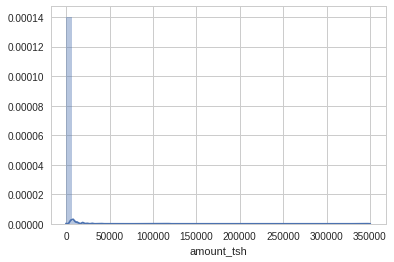

In [98]:
sns.distplot(data[data.amount_tsh>0].amount_tsh)

In [85]:
data[data.gps_height<0].gps_height.count()

1496

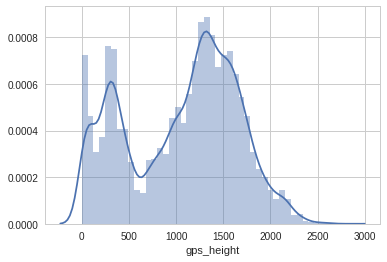

In [95]:
sns.distplot(data[data.gps_height>0].gps_height)

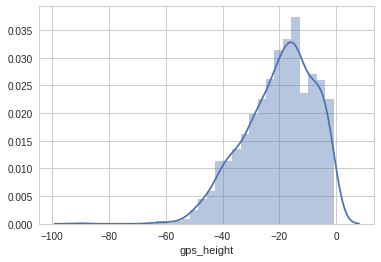

In [88]:
distribution(data[data.gps_height<0].gps_height)

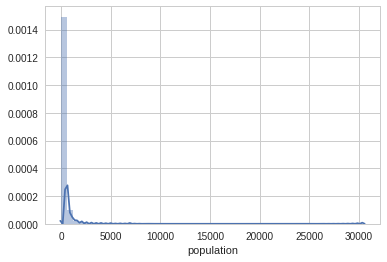

In [89]:
distribution(data[data.population>0].population)

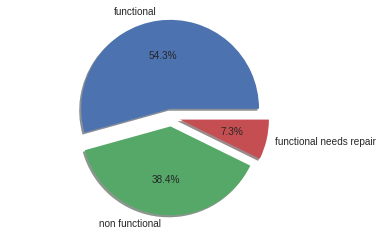

In [160]:
plot_pie(train.status_group)

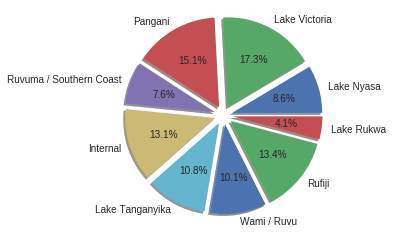

In [99]:
plot_pie(data.basin)

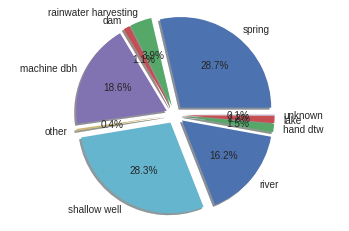

In [101]:
plot_pie(data.source)

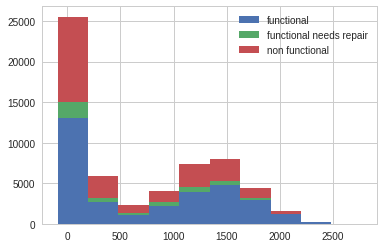

In [102]:
stackhist(data.gps_height, data.status_group)

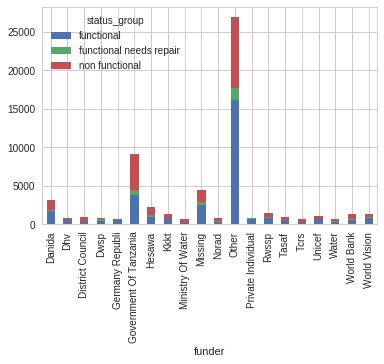

In [77]:
class_bycatcol(data.funder)

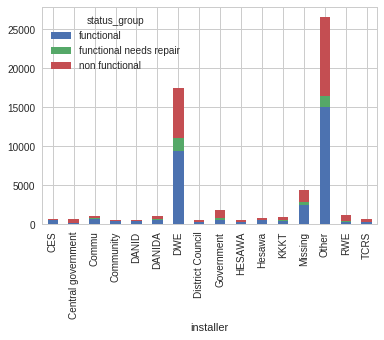

In [78]:
class_bycatcol(data.installer)

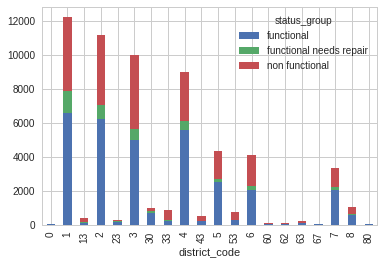

In [79]:
class_bycatcol(data.district_code)

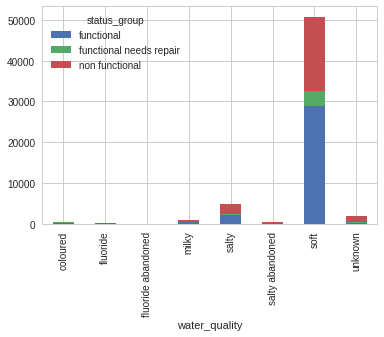

In [80]:
class_bycatcol(data.water_quality)

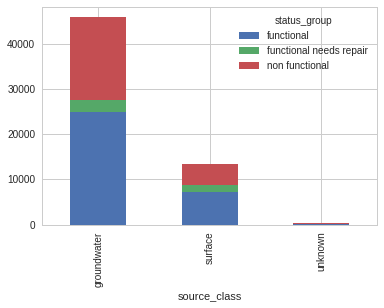

In [109]:
class_bycatcol(data.source_class)

In [110]:
population_subset = data[data.population>60].population

In [153]:
nonzero = data[(data.amount_tsh>0) & (data.gps_height!=0) & (data.population>0)]

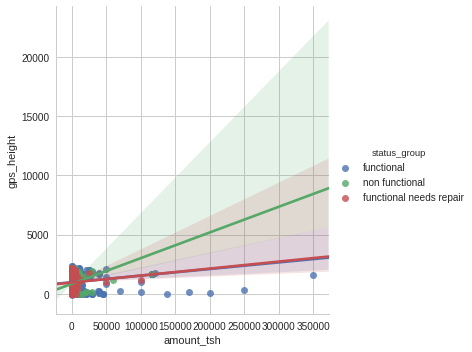

In [142]:
sns.lmplot(x="amount_tsh", y="gps_height", hue="status_group", data=nonzero)

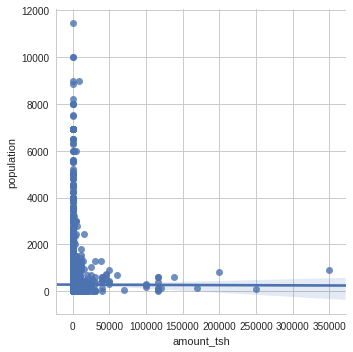

In [143]:
sns.lmplot(x="amount_tsh", y="population", data=nonzero)

{'boxes': [<matplotlib.lines.Line2D at 0x7f35f1c62898>],
 'caps': [<matplotlib.lines.Line2D at 0x7f35f1c6acc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f35f1c77c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f35f1c71da0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f35f1c62a90>,
  <matplotlib.lines.Line2D at 0x7f35f1c6aac8>]}

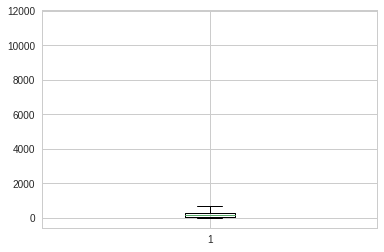

In [145]:
plt.boxplot(nonzero.population)

{'boxes': [<matplotlib.lines.Line2D at 0x7f35f1affb70>],
 'caps': [<matplotlib.lines.Line2D at 0x7f35f1b06f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f35f1b14f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f35f1b140b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f35f1affd68>,
  <matplotlib.lines.Line2D at 0x7f35f1b06da0>]}

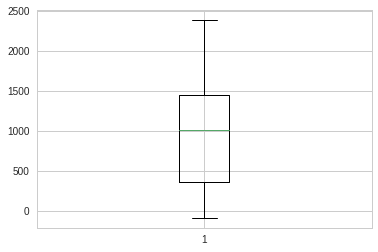

In [147]:
plt.boxplot(nonzero.gps_height)

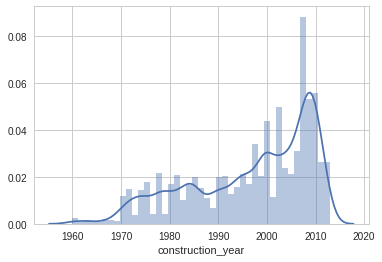

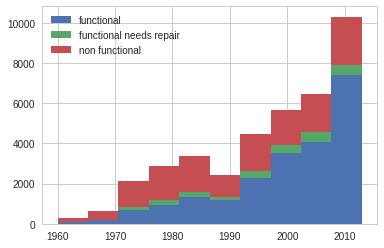

In [196]:
construction_year()

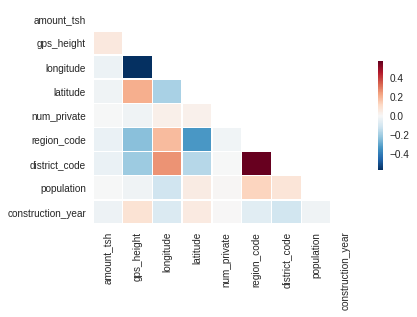

In [197]:
correlation(nonzero)

In [207]:
chisq_comp(data)

X² Value = 1921.0342260111142
computed_value = 16
basin is independent of class_label

X² Value = 219.96810233951118
computed_value = 46
subvillage is independent of class_label

X² Value = 4794.631126187152
computed_value = 40
region is independent of class_label

X² Value = 7365.638497624808
computed_value = 34
extraction_type is independent of class_label

X² Value = 2081.1263983553317
computed_value = 22
management is independent of class_label

X² Value = 2277.37334278519
computed_value = 14
water_quality is independent of class_label

X² Value = 11360.76789585276
computed_value = 8
quantity is independent of class_label

X² Value = 2623.9982801502624
computed_value = 18
source is independent of class_label

X² Value = 7450.3165966082925
computed_value = 12
waterpoint_type is independent of class_label



In [131]:
X_train = train.drop("status_group",axis=1)

In [137]:
X_train.ix[59399]

amount_tsh                             701.685
funder                              World Bank
gps_height                                 191
installer                                Other
longitude                               38.104
latitude                              -6.74746
basin                              Wami / Ruvu
subvillage                               Other
region                                Morogoro
region_code                                  5
district_code                                2
lga                             Morogoro Rural
ward                                Ngerengere
population                                 150
public_meeting                            True
scheme_management                          VWC
scheme_name                            Missing
permit                                    True
construction_year                         2002
extraction_type                    nira/tanira
extraction_type_group              nira/tanira
extraction_ty

In [132]:
Merged = pd.concat([X_train, test], axis=0)

In [133]:
Merged.shape

(74250, 35)

In [138]:
X = Merged

In [139]:
ctg_cols = X.select_dtypes(exclude=('int64','float64'))

In [140]:
ctg_cols.columns

Index(['funder', 'installer', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [141]:
for col in ctg_cols:
    enc = pd.get_dummies(X[col], drop_first=True, prefix=col, prefix_sep='_')
    X.drop(col, axis=1, inplace=True)
    X = pd.concat([X, enc],axis=1)

In [142]:
X.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year,funder_Dhv,funder_District Council,funder_Dwsp,funder_Germany Republi,funder_Government Of Tanzania,funder_Hesawa,funder_Kkkt,funder_Ministry Of Water,funder_Missing,funder_Norad,funder_Other,funder_Private Individual,funder_Rwssp,funder_Tasaf,funder_Tcrs,funder_Unicef,funder_Water,funder_World Bank,funder_World Vision,installer_Central government,installer_Commu,installer_Community,installer_DANID,installer_DANIDA,installer_DWE,installer_District Council,installer_Government,installer_HESAWA,installer_Hesawa,installer_KKKT,installer_Missing,installer_Other,installer_RWE,installer_TCRS,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,subvillage_I,subvillage_Kanisani,subvillage_Kati,subvillage_Kibaoni,subvillage_M,subvillage_Madukani,subvillage_Majengo,subvillage_Mapinduzi,subvillage_Mbuyuni,subvillage_Miembeni,subvillage_Missing,subvillage_Mjimwema,subvillage_Mjini,subvillage_Mkwajuni,subvillage_Mlimani,subvillage_Msikitini,subvillage_Mtakuja,subvillage_Muungano,subvillage_Mwenge,subvillage_Other,subvillage_Shuleni,subvillage_Sokoni,subvillage_Songambele,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,region_code_10,region_code_11,region_code_12,region_code_13,region_code_14,region_code_15,region_code_16,region_code_17,region_code_18,region_code_19,region_code_2,region_code_20,region_code_21,region_code_24,region_code_3,region_code_4,region_code_40,region_code_5,region_code_6,region_code_60,region_code_7,region_code_8,region_code_80,region_code_9,region_code_90,region_code_99,district_code_1,district_code_13,district_code_2,district_code_23,district_code_3,district_code_30,district_code_33,district_code_4,district_code_43,district_code_5,district_code_53,district_code_6,district_code_60,district_code_62,district_code_63,district_code_67,district_code_7,district_code_8,district_code_80,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,...,ward_Ukiriguru,ward_Ukondamoyo,ward_Ukumbi,ward_Ukumbisiganga,ward_Ukune,ward_Ukwama,ward_Ukwega,ward_Ulanda,ward_Ulaya,ward_Ulemo,ward_Ulenje,ward_Ulowa,ward_Umwe,ward_Unga Ltd,ward_Unyambwa,ward_Unyamikumbi,ward_Upuge,ward_Urambo,ward_Uru Kaskazini,ward_Uru Kusini Mawela,ward_Uru Mashariki,ward_Uru Shimbw

In [143]:
X_train = X.iloc[0:59400, :]

In [144]:
X_test = X.iloc[59400:, :]

In [148]:
y_train = train['status_group']

In [149]:
clf = RandomForestClassifier(class_weight='balanced',n_estimators=103, random_state=111)

In [172]:
clf = tree.DecisionTreeClassifier()

In [168]:
X_train.head()

,amount_tsh,gps_height,longitude,latitude,population,construction_year,funder_Dhv,funder_District Council,funder_Dwsp,funder_Germany Republi,funder_Government Of Tanzania,funder_Hesawa,funder_Kkkt,funder_Ministry Of Water,funder_Missing,funder_Norad,funder_Other,funder_Private Individual,funder_Rwssp,funder_Tasaf,funder_Tcrs,funder_Unicef,funder_Water,funder_World Bank,funder_World Vision,installer_Central government,installer_Commu,installer_Community,installer_DANID,installer_DANIDA,installer_DWE,installer_District Council,installer_Government,installer_HESAWA,installer_Hesawa,installer_KKKT,installer_Missing,installer_Other,installer_RWE,installer_TCRS,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,subvillage_I,subvillage_Kanisani,subvillage_Kati,subvillage_Kibaoni,subvillage_M,subvillage_Madukani,subvillage_Majengo,subvillage_Mapinduzi,subvillage_Mbuyuni,subvillage_Miembeni,subvillage_Missing,subvillage_Mjimwema,subvillage_Mjini,subvillage_Mkwajuni,subvillage_Mlimani,subvillage_Msikitini,subvillage_Mtakuja,subvillage_Muungano,subvillage_Mwenge,subvillage_Other,subvillage_Shuleni,subvillage_Sokoni,subvillage_Songambele,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,region_code_10,region_code_11,region_code_12,region_code_13,region_code_14,region_code_15,region_code_16,region_code_17,region_code_18,region_code_19,region_code_2,region_code_20,region_code_21,region_code_24,region_code_3,region_code_4,region_code_40,region_code_5,region_code_6,region_code_60,region_code_7,region_code_8,region_code_80,region_code_9,region_code_90,region_code_99,district_code_1,district_code_13,district_code_2,district_code_23,district_code_3,district_code_30,district_code_33,district_code_4,district_code_43,district_code_5,district_code_53,district_code_6,district_code_60,district_code_62,district_code_63,district_code_67,district_code_7,district_code_8,district_code_80,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Lindi Urban,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nyamagana,lga_Nzega,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,...,ward_Ukiriguru,ward_Ukondamoyo,ward_Ukumbi,ward_Ukumbisiganga,ward_Ukune,ward_Ukwama,ward_Ukwega,ward_Ulanda,ward_Ulaya,ward_Ulemo,ward_Ulenje,ward_Ulowa,ward_Umwe,ward_Unga Ltd,ward_Unyambwa,ward_Unyamikumbi,ward_Upuge,ward_Urambo,ward_Uru Kaskazini,ward_Uru Kusini Mawela,ward_Uru Mashariki,ward_Uru Shimbw

In [170]:
y= train['status_group']

In [173]:
clf.fit(X_train, train['status_group'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
submission_pred = clf.predict(X_test)

In [153]:
submission(submission_pred)

      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
Index(['id', 'status_group'], dtype='object')


In [175]:
len(train.columns)

40

In [39]:
GridSearchModel(X,y)

[mean: 0.79970, std: 0.00308, params: {'max_features': 'auto', 'n_estimators': 81}, mean: 0.80056, std: 0.00205, params: {'max_features': 'auto', 'n_estimators': 101}, mean: 0.80003, std: 0.00250, params: {'max_features': 'sqrt', 'n_estimators': 81}, mean: 0.80042, std: 0.00291, params: {'max_features': 'sqrt', 'n_estimators': 101}, mean: 0.79611, std: 0.00363, params: {'max_features': 'log2', 'n_estimators': 81}, mean: 0.79625, std: 0.00282, params: {'max_features': 'log2', 'n_estimators': 101}]
{'max_features': 'auto', 'n_estimators': 101}
0.8005555555555556


In [3]:
def load_data():
    
    #read files
    trainX = pd.read_csv("trainX.csv")
    trainY = pd.read_csv("trainY.csv")
    
    #concat class labels
    data = pd.concat([trainX,trainY], axis=1)
    data.drop('id', axis=1, inplace=True)
    return data

In [47]:
def prepare_data(data):
    
    #drop irrelevant columns
    data.drop(['date_recorded', 'wpt_name', 'num_private', 'recorded_by'],axis=1,inplace=True)
    
    #drop correlated columns
   # data.drop(['extraction_type_group', 'extraction_type_class','management_group',
    #          'payment_type', 'quality_group', 'quantity_group', 'source_type', 'source_class', 
    #          'waterpoint_type_group'],axis=1,inplace=True)
    
    #fill missing values
    data.amount_tsh = data.amount_tsh.apply(fill_zero, name='amount_tsh')
    data.gps_height = data.gps_height.apply(fill_zero, name='gps_height')
    
    data.public_meeting = data.public_meeting.fillna("Missing")
    data.public_meeting = pd.Categorical(data.public_meeting,categories=[True, "Missing",False], ordered=False)

    data['permit'] = data.permit.fillna("Missing")
    data.permit = pd.Categorical(data.permit,categories=[True, "Missing",False], ordered=False)

    data['scheme_management'] = data['scheme_management'].fillna('Missing')
    data['scheme_name'] = data['scheme_name'].fillna('Missing')
    data['funder'] = data['funder'].fillna('Missing')
    data['installer'] = data['installer'].fillna('Missing')
    data['subvillage'] = data['subvillage'].fillna('Missing')
    
    
    #change data type from integer to string
    data['region_code'] = data['region_code'].astype('str')
    data['district_code'] = data['district_code'].astype('str')
    return data
    

In [5]:
def fill_zero(col, name):
    if int(col)==0:
        col = data[name].mean()
    else:
        col=col
    return col

In [6]:
def groupCategories(col):
    if col=='0':
        col="Missing"
    if col not in collist:
        col = "Other"
    else:
        col=col
    return col

In [7]:
def chisq_comp(data):
    
    columns = ['basin', 'subvillage', 'region', 'extraction_type', 'management',\
              'water_quality', 'quantity', 'source', 'waterpoint_type']
    for col in columns:
        ct = pd.crosstab(data.status_group, data[col])
        colsum = ct.sum(axis=0)
        colpct = ct/colsum
        cs1 = scipy.stats.chi2_contingency(ct)
        print("X² Value = {0}".format(cs1[0]))
        print("computed_value = {0}".format(cs1[2]))
        if cs1[2]>cs1[0]:
            print(col + " is dependent of class_label")
        else:
            print(col + " is independent of class_label")
        print()

In [8]:
def stackhist(x, y, **kws):
    
    #group x by y
    grouped = pd.groupby(x, y)
    
    #iterate over grouped data
    data = [d for _, d in grouped]
    
    #iterate over labels
    labels = [l for l, _ in grouped]
    
    #plot data stacked by each label
    plt.hist(data, histtype="barstacked", label=labels)
    plt.legend()
    plt.show()

In [9]:
def class_bycatcol(col):
    #plot class by categorical colum
    (data
     .groupby([col,'status_group'])
     .size()
     .unstack()
     .plot.bar(stacked=True)
    )

In [10]:
def facet_grid(data,x,y):
    
    #scatter plot numeric cols by class label
    (data
     .pipe(sns.FacetGrid, 
           col="status_group", 
           col_wrap=4, 
           aspect=.5, 
           size=6)
     .map(plt.scatter, x, y, s=20)
     .fig.subplots_adjust(wspace=.2, hspace=.2)
    )

In [11]:
def distribution(column, bins):
    
    #for plotting distribution of numeric data
    sns.distplot(column, norm_hist=True, bins=100)
    plt.show()

In [12]:
def box_plot(column):

    #this function plots boxplot

    plt.boxplot(column)
    plt.boxplot(column,1)
    plt.boxplot(column,0, '')
    plt.boxplot(column, 0, 'gD')
    

In [13]:
def construction_year():
    
    #function for visualizing class labels w.r.t construction year

    nz_cy_data = data[data['construction_year']!=0] # non zero values

    distribution(nz_cy_data['construction_year']) # distribution plot

    stackhist(nz_cy_data.construction_year, nz_cy_data.status_group)


In [14]:
def plot_pie(y):
    
    #function to plot distribution of categorical column
    
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct='%1.1f%%')
    ax.axis('equal')

In [15]:
def correlation(data):
    
    #for plotting correlations
    
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=np.bool) #to plot lower triangle
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    

In [ ]:
def features_encode(X):
    ctg_cols = X.select_dtypes(exclude=('int64','float64'))
    
    for col in ctg_cols:
        enc = pd.get_dummies(X[col], drop_first=True, prefix=col, prefix_sep='_')
        X.drop(col, axis=1, inplace=True)
        X = pd.concat([X, enc],axis=1)
        return X

In [41]:
def model(X, data):
    
    start_time = time()
    
    y = data["status_group"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=111)

    clf = RandomForestClassifier(class_weight='balanced',n_estimators=103, random_state=111)

    #clf = RandomForestClassifier(random_state=111)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    end_time = time()
    elapsed_time = end_time - start_time
    print("Time to compute TFIDF: %.3f seconds" % elapsed_time)

    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return clf
    

In [ ]:
X.shape

In [38]:
def GridSearchModel(X,y):
    
    from sklearn.grid_search import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier

    rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

    param_grid = { 
    'n_estimators': [81,101],
    'max_features': ['auto', 'sqrt', 'log2']
    }


    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(X, y)
    print(CV_rfc.grid_scores_)
    print(CV_rfc.best_params_)
    print(CV_rfc.best_score_)

In [44]:
def submission(submission_pred):
    
    test_id = pd.DataFrame(pd.read_csv('testX.csv')['id'])

    submission = pd.concat([test_id,pd.DataFrame(submission_pred)], axis=1)

    submission = submission.rename(columns={0:'status_group'})

    print(submission.head())

    submission.to_csv("SubmissionFormat.csv", index=False)

    print(submission.columns)

In [17]:
def tree_visualize(clf):

    filename = '/home/jovyan/WP/clf.pkl'
    
    tree.export_graphviz(clf, out_file='tree.dot')

    joblib.dump(clf, filename, compress=9)

In [174]:
tree_visualize(clf)